In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt


In [12]:
x_test=np.load("q1/x_test.npy")
x_train=np.load("q1/x_train.npy")
y_test=np.load("q1/y_test.npy")
y_train=np.load("q1/y_train.npy")

In [15]:
x_test.shape , x_train.shape

((10000, 28, 28), (60000, 28, 28))

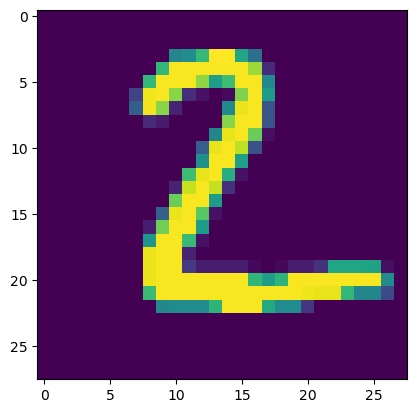

In [16]:
plt.imshow(x_test[1])
plt.show()

In [27]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D(pool_size=2 , strides=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(pool_size=2 , strides=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(10)(x)

outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [32]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint("imde.keras",save_best_only=True)]
history = model.fit(x_train, y_train, epochs=6, callbacks=callbacks, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0662 - accuracy: 0.9819 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 2/6
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0570 - accuracy: 0.9844 - val_loss: 0.0607 - val_accuracy: 0.9817
Epoch 3/6
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0531 - accuracy: 0.9854 - val_loss: 0.0655 - val_accuracy: 0.9825
Epoch 4/6
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0486 - accuracy: 0.9867 - val_loss: 0.0741 - val_accuracy: 0.9844
Epoch 5/6
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0469 - accuracy: 0.9876 - val_loss: 0.0583 - val_accuracy: 0.9864
Epoch 6/6
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0449 - accuracy: 0.9890 - val_loss: 0.0815 - val_accuracy: 0.9820


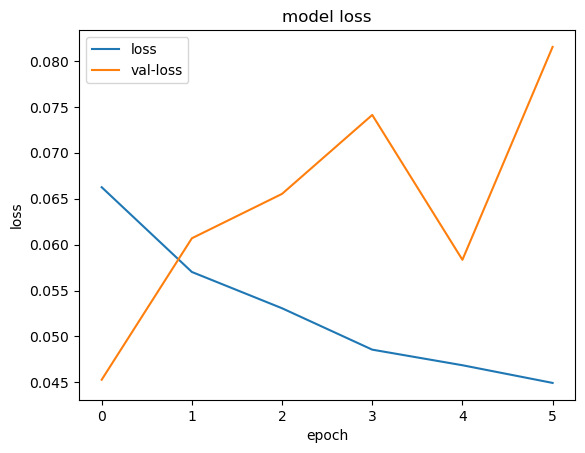

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val-loss'], loc='upper left')
plt.show()

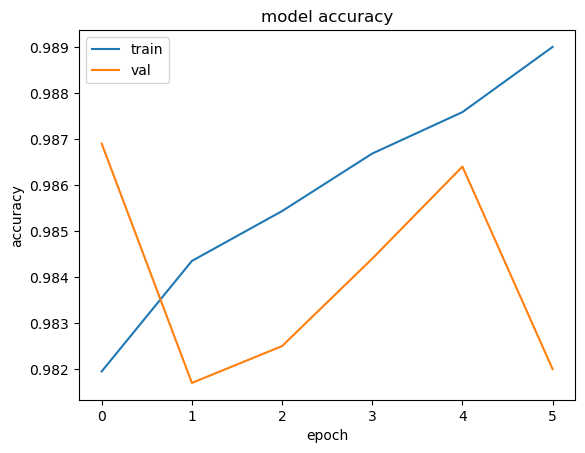

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
انواع توابع اکتیویشن:
    
Sigmoid (Logistic)
A = 1/(1 + e-x)
بین صفر و یک است بنابراین برای باینری استفاده مناسبتری دارد و اعداد بالای نیم به یک تفسیر میشوند.


Hyperbolic Tangent (Tanh):
    عملکردش شبیه و بهتر از سیگموید است بین یک و منهای یک خروجی میدهد بنابراین میانگینیش صفر میشود و ورودی مناسبتری به لایه های بعدی میدهد.

    
Rectified Linear Unit (ReLU):
    A(x) = max(0,x)
معمولترین تابع که به دلیل سادگی سرعت بالا و نتیجه مناسبی دارد و در مقابل ونیشینگ گرادیانت هم کمتر حساس است
خروجی  صفر تا بینهایت



توابع دیگر مورد استفاده های خاص:
Leaky ReLU
Parametric Leaky ReLU (PReLU)
Exponential Linear Units (ELU)
Scaled Exponential Linear Unit (SELU)